In [1]:
# Hackathon - https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon-4/
# Problem statement is available on the above link.

# Load all the imports in this section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
import pickle
%matplotlib inline
from sklearn.model_selection import train_test_split


np.set_printoptions(threshold=np.nan)

In [2]:
# Load .csv files.
# Check the number of samples (size of the datasets)
# Check if you have a skewed class distribution

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(test_data.columns)
print(test_data.shape)

print(train_data.columns)
print(train_data.shape)

print(sum(train_data['renewal'] == 1.0))
print(sum(train_data['renewal'] == 0.0))

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium'],
      dtype='object')
(34224, 12)
Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal'],
      dtype='object')
(79853, 13)
74855
4998


In [3]:
train_data.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,22200,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.33,3,A,Urban,9600,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,7500,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,5400,0


In [4]:
# Analysis...
# Check how many entries are NA
# Check the type of each column
# Check the range of values of each numeric column
# Other misc analysis
print("########## Number of missing values ##########")
for col in train_data.columns:
    print("{:40s}".format(col), "{:5d}".format(sum(train_data[col].isna())), "{:5d}".format(sum(train_data[col].isnull())))

print("\n########## Type of columns ##########")
for col in train_data.columns:
    print("{:40s}".format(col), train_data[col].dtype)

print("\n########## Max/min ##########")
for col in train_data.columns:
    if train_data[col].dtype != 'object':
        print("{:40s}".format(col), "{:15f}".format(max(train_data[col])), "{:15f}".format(min(train_data[col])))
    else:
        print("{:40s}".format(col), "type is not supported for max/min")

print("\n########## Other info ##########")
print(train_data.residence_area_type.unique())
print("Count of Urban", sum(train_data.residence_area_type == 'Urban'))
print("Count of Rural", sum(train_data.residence_area_type == 'Rural'))
print("Count of Sourcing channel A", sum(train_data.sourcing_channel == 'A'))
print("Count of Sourcing channel B", sum(train_data.sourcing_channel == 'B'))
print("Count of Sourcing channel C", sum(train_data.sourcing_channel == 'C'))

########## Number of missing values ##########
id                                           0     0
perc_premium_paid_by_cash_credit             0     0
age_in_days                                  0     0
Income                                       0     0
Count_3-6_months_late                       97    97
Count_6-12_months_late                      97    97
Count_more_than_12_months_late              97    97
application_underwriting_score            2974  2974
no_of_premiums_paid                          0     0
sourcing_channel                             0     0
residence_area_type                          0     0
premium                                      0     0
renewal                                      0     0

########## Type of columns ##########
id                                       int64
perc_premium_paid_by_cash_credit         float64
age_in_days                              int64
Income                                   int64
Count_3-6_months_late              

In [5]:
# Analysis...
# Check if the observations gathered from the dataset applies to subset as well e.g. subset created based on 'residence_type'
urban_train_data = train_data[train_data.residence_area_type == 'Urban']
rural_train_data = train_data[train_data.residence_area_type == 'Rural']

print(train_data.residence_area_type.unique())
print("Count of Urban", sum(train_data.residence_area_type == 'Urban'))
print("Count of Rural", sum(train_data.residence_area_type == 'Rural'))

print("########## Number of missing values ##########")
print("{:40s}".format("Columns"), 
      "{:5s}".format("U na "), 
      "{:5s}".format("U null "),
      "{:5s}".format("R na "), 
      "{:5s}".format("R null "))
print("{:40s}".format("-------"), 
      "{:5s}".format("------"), 
      "{:5s}".format("------"),
      "{:5s}".format("------"),
      "{:5s}".format("------"))
for col in urban_train_data.columns:
    print("{:40s}".format(col), 
          "{:5d}".format(sum(urban_train_data[col].isna())), 
          "{:5d}".format(sum(urban_train_data[col].isnull())),
          "{:5d}".format(sum(rural_train_data[col].isna())),
          "{:5d}".format(sum(rural_train_data[col].isnull())))

print("\n########## Max/min ##########")
print("{:40s}".format("Columns"), 
      "{:15s}".format("U max "), 
      "{:15s}".format("U min "),
      "{:15s}".format("R max "), 
      "{:15s}".format("R min "))
print("{:40s}".format("-------"), 
      "{:15s}".format("------"), 
      "{:15s}".format("------"),
      "{:15s}".format("------"),
      "{:15s}".format("------"))
for col in urban_train_data.columns:
    if urban_train_data[col].dtype != 'object':
        print("{:40s}".format(col),
              "{:15f}".format(max(urban_train_data[col])),
              "{:15f}".format(min(urban_train_data[col])),
              "{:15f}".format(max(rural_train_data[col])),
              "{:15f}".format(min(rural_train_data[col])))
    else:
        print("{:40s}".format(col), "type is not supported for max/min")


print("\n########## Other info ##########")
print("{:30s}".format("Count of sourcing channel"), 
      "{:5s}".format("Urban"),
      "{:5s}".format("Rural"))
print("{:30s}".format("-----"), 
      "{:5s}".format("-----"),
      "{:5s}".format("-----"))
print("{:30s}".format("Count of Sourcing channel A"), 
      "{:5d}".format(sum(urban_train_data.sourcing_channel == 'A')),
      "{:5d}".format(sum(rural_train_data.sourcing_channel == 'A')))
print("{:30s}".format("Count of Sourcing channel B"), 
      "{:5d}".format(sum(urban_train_data.sourcing_channel == 'B')),
      "{:5d}".format(sum(rural_train_data.sourcing_channel == 'B')))
print("{:30s}".format("Count of Sourcing channel C"), 
      "{:5d}".format(sum(urban_train_data.sourcing_channel == 'C')),
      "{:5d}".format(sum(rural_train_data.sourcing_channel == 'C')))

['Urban' 'Rural']
Count of Urban 48183
Count of Rural 31670
########## Number of missing values ##########
Columns                                  U na  U null  R na  R null 
-------                                  ------ ------ ------ ------
id                                           0     0     0     0
perc_premium_paid_by_cash_credit             0     0     0     0
age_in_days                                  0     0     0     0
Income                                       0     0     0     0
Count_3-6_months_late                       67    67    30    30
Count_6-12_months_late                      67    67    30    30
Count_more_than_12_months_late              67    67    30    30
application_underwriting_score            1840  1840  1134  1134
no_of_premiums_paid                          0     0     0     0
sourcing_channel                             0     0     0     0
residence_area_type                          0     0     0     0
premium                                 

(79853, 13)
10000.0 0
50000.0 3391
100000.0 17023
500000.0 77038
1000000.0 79355
5000000.0 79827
10000000.0 79842
50000000.0 79851
100000000.0 79853
(79853, 13)


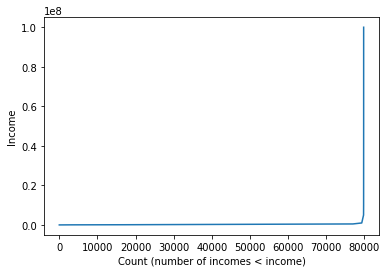

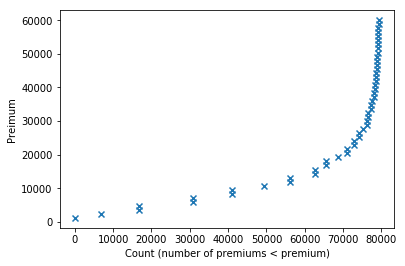

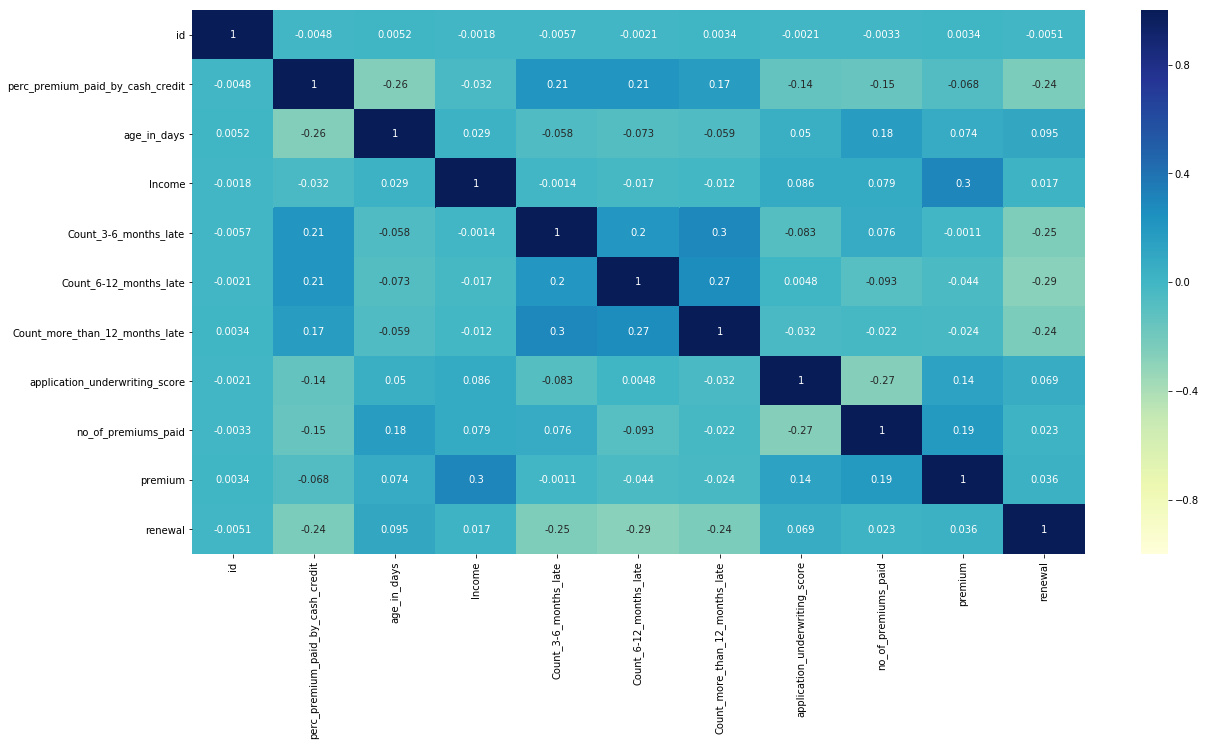

In [6]:
# Analysis...

# Check if any variable is following a power law distribution
# Check out the correlation between all variables (columns)

name = 'Income'
values = [10000.0, 50000.0, 100000.0, 500000.0, 1000000.0, 5000000.0, 10000000.0, 50000000.0, 100000000.0]
counts = []

for index, val in enumerate(values):
    val = sum(train_data[name] < val)
    counts.append(val)

print(train_data.shape)

for index, val in enumerate(values):
    print(val, counts[index])

plt.figure()
plt.plot(counts, values)
plt.xlabel('Count (number of incomes < income)')
plt.ylabel('Income')

# Check if this is power law
name = 'premium'
values = np.linspace(train_data[name].min(), 
                      train_data[name].max(), num=50)
counts = []

for index, val in enumerate(values):
    val = sum(train_data[name] < val)
    counts.append(val)

print(train_data.shape)

plt.figure()
plt.scatter(counts, values, marker='x')
plt.xlabel('Count (number of premiums < premium)')
plt.ylabel('Preimum')

plt.figure(figsize=(20,10))
train_data_corr = train_data.corr(method='pearson', min_periods=1)
sns.heatmap(train_data_corr, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

In [7]:
# Pre-processing...
# Generate "age_in_years" from "age_in_days" variable.
# Fill NA values with mean and 0.0
# Generate Z scores of the columns (in order to normalize it)
# Apply the same steps on test dataset as well

from scipy import stats

############## train data ##############
train_data['age_in_years'] = train_data.age_in_days // 365
train_data['remaining_days_after_years'] = train_data.age_in_days % 365

for col in train_data.columns:
    if train_data[col].dtype != 'object':
        train_data[col] = train_data[col].astype('float64')

train_data['application_underwriting_score'] = train_data['application_underwriting_score'].fillna(
    train_data['application_underwriting_score'].mean())
train_data = train_data.fillna(0.0)

train_data['zscore_Income'] = stats.zscore(train_data['Income'])
train_data['zscore_premium'] = stats.zscore(train_data['premium'])
train_data['zscore_application_underwriting_score'] = stats.zscore(train_data['application_underwriting_score'])
train_data['zscore_perc_premium_paid_by_cash_credit'] = stats.zscore(train_data['perc_premium_paid_by_cash_credit'])
train_data['zscore_Count_3-6_months_late'] = stats.zscore(train_data['Count_3-6_months_late'])
train_data['zscore_Count_6-12_months_late'] = stats.zscore(train_data['Count_6-12_months_late'])
train_data['zscore_Count_more_than_12_months_late'] = stats.zscore(train_data['Count_more_than_12_months_late'])
train_data['zscore_no_of_premiums_paid'] = stats.zscore(train_data['no_of_premiums_paid'])
train_data['zscore_age_in_years'] = stats.zscore(train_data['age_in_years'])

print(train_data.columns)
print(train_data.shape)

############## test data ##############
test_data['age_in_years'] = test_data.age_in_days // 365
test_data['remaining_days_after_years'] = test_data.age_in_days % 365

for col in test_data.columns:
    if test_data[col].dtype != 'object':
        test_data[col] = test_data[col].astype('float64')

test_data['application_underwriting_score'] = test_data['application_underwriting_score'].fillna(
    test_data['application_underwriting_score'].mean())
test_data = test_data.fillna(0.0)

test_data['zscore_Income'] = stats.zscore(test_data['Income'])
test_data['zscore_premium'] = stats.zscore(test_data['premium'])
test_data['zscore_application_underwriting_score'] = stats.zscore(test_data['application_underwriting_score'])
test_data['zscore_perc_premium_paid_by_cash_credit'] = stats.zscore(test_data['perc_premium_paid_by_cash_credit'])
test_data['zscore_Count_3-6_months_late'] = stats.zscore(test_data['Count_3-6_months_late'])
test_data['zscore_Count_6-12_months_late'] = stats.zscore(test_data['Count_6-12_months_late'])
test_data['zscore_Count_more_than_12_months_late'] = stats.zscore(test_data['Count_more_than_12_months_late'])
test_data['zscore_no_of_premiums_paid'] = stats.zscore(test_data['no_of_premiums_paid'])
test_data['zscore_age_in_years'] = stats.zscore(test_data['age_in_years'])

print(test_data.columns)
print(test_data.shape)

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal', 'age_in_years', 'remaining_days_after_years',
       'zscore_Income', 'zscore_premium',
       'zscore_application_underwriting_score',
       'zscore_perc_premium_paid_by_cash_credit',
       'zscore_Count_3-6_months_late', 'zscore_Count_6-12_months_late',
       'zscore_Count_more_than_12_months_late', 'zscore_no_of_premiums_paid',
       'zscore_age_in_years'],
      dtype='object')
(79853, 24)
Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'pr

In [8]:
# Convert categorical variable into dummy/indicator variables and use it in training
# Apply the same steps to test dataset as well.
df1 = pd.get_dummies(train_data['residence_area_type'])
df2 = pd.get_dummies(train_data['sourcing_channel'])

print(train_data.shape)
train_data = pd.concat([train_data, df1, df2], axis=1)
train_data['Rural'] = train_data['Rural'].astype('float64')
train_data['Urban'] = train_data['Urban'].astype('float64')
train_data['A'] = train_data['A'].astype('float64')
train_data['B'] = train_data['B'].astype('float64')
train_data['C'] = train_data['C'].astype('float64')
train_data['D'] = train_data['D'].astype('float64')
train_data['E'] = train_data['E'].astype('float64')
print(train_data.shape)

df1 = pd.get_dummies(test_data['residence_area_type'])
df2 = pd.get_dummies(test_data['sourcing_channel'])

print(test_data.shape)
test_data = pd.concat([test_data, df1, df2], axis=1)
test_data['Rural'] = test_data['Rural'].astype('float64')
test_data['Urban'] = test_data['Urban'].astype('float64')
test_data['A'] = test_data['A'].astype('float64')
test_data['B'] = test_data['B'].astype('float64')
test_data['C'] = test_data['C'].astype('float64')
test_data['D'] = test_data['D'].astype('float64')
test_data['E'] = test_data['E'].astype('float64')
print(test_data.shape)

train_data.head(10)

(79853, 24)
(79853, 31)
(34224, 23)
(34224, 30)


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,...,zscore_Count_more_than_12_months_late,zscore_no_of_premiums_paid,zscore_age_in_years,Rural,Urban,A,B,C,D,E
0,110936.0,0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13.0,C,...,-0.192199,0.413122,-1.303917,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41492.0,0.010,21546.0,315150.0,0.0,0.0,0.0,99.89,21.0,A,...,-0.192199,1.960315,0.518037,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,31300.0,0.917,17531.0,84140.0,2.0,3.0,1.0,98.69,7.0,C,...,3.014592,-0.747272,-0.252789,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19415.0,0.049,15341.0,250510.0,0.0,0.0,0.0,99.57,9.0,A,...,-0.192199,-0.360474,-0.673240,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,99379.0,0.052,31400.0,198680.0,0.0,0.0,0.0,99.87,12.0,B,...,-0.192199,0.219723,2.410066,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,59951.0,0.540,17527.0,282080.0,2.0,0.0,0.0,99.18,9.0,B,...,-0.192199,-0.360474,-0.252789,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,54031.0,1.000,24829.0,118400.0,0.0,0.0,0.0,99.05,11.0,B,...,-0.192199,0.026324,1.148714,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,94290.0,1.000,21911.0,180240.0,1.0,6.0,4.0,99.33,3.0,A,...,12.634965,-1.520869,0.588112,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,93730.0,0.621,9868.0,92520.0,0.0,0.0,0.0,99.58,4.0,A,...,-0.192199,-1.327470,-1.724367,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,84844.0,0.908,23008.0,107180.0,2.0,0.0,0.0,98.91,11.0,A,...,-0.192199,0.026324,0.798338,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
# Modeling...
# Create train and validation dataset. 
# Divide the skewed and non-skewed classes proportionally, so that both train and validation dataset contains class 0 samples.
# Try different models and their hyper-parameters to tune the model.
# Use confusion_matrix and classification_report for analysis.
# Predict the probability to use it for the second problem.

x_columns = ['zscore_perc_premium_paid_by_cash_credit', 
             'zscore_Income',
             'zscore_Count_3-6_months_late', 
             'zscore_Count_6-12_months_late',
             'zscore_Count_more_than_12_months_late', 
             'zscore_application_underwriting_score',
             'zscore_no_of_premiums_paid', 
             'zscore_premium', 
             'zscore_age_in_years', 'Urban', 'Rural', 'A', 'B', 'C', 'D', 'E']

y_column = ['renewal']

train_data_class_1 = train_data[train_data['renewal'] == 1.0]
train_data_class_0 = train_data[train_data['renewal'] == 0.0]
print(train_data_class_0.shape)
print(train_data_class_1.shape)

train_data_class_0, valid_data_class_0 = train_test_split(train_data_class_0, test_size=0.1)
train_data_class_1, valid_data_class_1 = train_test_split(train_data_class_1, test_size=0.2)
print(train_data_class_0.shape, valid_data_class_0.shape)
print(train_data_class_1.shape, valid_data_class_1.shape)

train_data_classes = pd.concat([train_data_class_0, train_data_class_1], axis=0)

valid_data_classes = pd.concat([valid_data_class_0, valid_data_class_1], axis=0)
print(train_data_classes.shape, valid_data_classes.shape)

X_train = train_data_classes[x_columns]
y_train = train_data_classes[y_column]

X_valid = valid_data_classes[x_columns]
y_valid = valid_data_classes[y_column]

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
# y_pred = logreg.predict(X_valid)
# print(confusion_matrix(y_valid, y_pred))
# print(classification_report(y_valid, y_pred))

# clf = RandomForestClassifier(max_depth=15, random_state=0, max_features=6)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_valid)
# print(confusion_matrix(y_valid, y_pred))
# print(classification_report(y_valid, y_pred))

# clf = GradientBoostingClassifier(n_estimators=40, learning_rate=0.1, max_depth=15, random_state=0, max_features=10)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_valid)
# print(confusion_matrix(y_valid, y_pred))
# print(classification_report(y_valid, y_pred))

clf = DecisionTreeClassifier(max_depth=10, random_state=0, max_features=16, criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

y_submission = clf.predict_proba(test_data[x_columns])
#print(y_submission)
#print(y_submission[:,1]) # class 1
print("Ready for optimization")

(4998, 31)
(74855, 31)
(4498, 31) (500, 31)
(59884, 31) (14971, 31)
(64382, 31) (15471, 31)
[[   84   416]
 [  183 14788]]
             precision    recall  f1-score   support

        0.0       0.31      0.17      0.22       500
        1.0       0.97      0.99      0.98     14971

avg / total       0.95      0.96      0.96     15471

Ready for optimization


In [19]:
# Equation for the effort-incentives curve:
# effort_hours = 10*(1-exp(-incentives/400))

# Equation for the % improvement in renewal prob vs effort curve: 
# precent_p = 20*(1-exp(-effort_hours/5))

# Total revenue
# total_net_revenue = sum((y_submission[:,1] + percent_p * y_submission[:,1]) * test_data['premium'] - incentives)

# Using the probability calculated in the above cell, maximize total net revenue based and generate the final incentives for the 
# agents.
length = y_submission.shape[0]
max_iter = 2

from datetime import datetime
start_time = datetime.now() 
time_elapsed = 0.0
avg_value = 1650.0

iteration = 0
def callback_fn(var):
    global start
    global time_elapsed
    time_elapsed = datetime.now() - start_time 
    global iteration
    iteration += 1
    print("Iteration ", iteration, 'Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))
    start = datetime.now()

# Total net revenue function to maximize.
def minimize_this(incentives):
    return -(sum((y_submission[:length,1] + 
                  (20*(1-np.exp(-(10*(1-np.exp(-incentives/400)))/5))) * 
                  y_submission[:length,1]) * test_data['premium'][:length] - incentives))

from scipy.optimize import minimize
x0 = np.ones(length) * avg_value
res = minimize(minimize_this, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True, 'maxiter':max_iter}, 
               callback=callback_fn)

# Final incentives.
print(res.x)

Iteration  1 Time elapsed (hh:mm:ss.ms) 0:03:05.155263
[1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.  1650.
 1650.  1650.  1650.  1650.  1650. 

In [20]:
# Since there are 34000 samples in the test dataset. Running maximization problem on all the samples at the same time is 
# computationally very expensive.
# So, run the maximization problem on a subset of the samples and keep concatenating the results.
from scipy.optimize import minimize

from datetime import datetime
start_time = datetime.now() 

avg_value = 1650.0
length = y_submission.shape[0]
sub_length = 10
start_index = 0
final_index = start_index + sub_length

full_res = []
while final_index < length:
    print("indexes --1--", start_index, final_index, len(full_res))
    sub_premium = test_data['premium'][start_index:final_index]
    sub_y_submission = y_submission[start_index:final_index,1]
        
    def minimize_this(incentives):
        return -(sum((sub_y_submission + 
                      (20*(1-np.exp(-(10*(1-np.exp(-incentives/400)))/5))) * 
                      sub_y_submission) * sub_premium - incentives))

    x0 = np.ones(sub_length) * avg_value
    res = minimize(minimize_this, x0, method='nelder-mead', 
                   options={'xtol': 1e-8, 'disp': True, 'maxiter':10000})
    full_res = full_res + list(res.x)
    
    start_index = final_index
    final_index = start_index + sub_length
else:
    sub_length = length - start_index
    print("indexes --2--", start_index, final_index, len(full_res))
    sub_premium = test_data['premium'][start_index:]
    sub_y_submission = y_submission[start_index:,1]
        
    def minimize_this(incentives):
        return -(sum((sub_y_submission + 
                      (20*(1-np.exp(-(10*(1-np.exp(-incentives/400)))/5))) * 
                      sub_y_submission) * sub_premium - incentives))

    x0 = np.ones(sub_length) * avg_value
    res = minimize(minimize_this, x0, method='nelder-mead', 
                   options={'xtol': 1e-8, 'disp': True, 'maxiter':10000})
    full_res = full_res + list(res.x)

print(length)
print(len(full_res))

time_elapsed = datetime.now() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

indexes --1-- 0 10 0
Optimization terminated successfully.
         Current function value: -1817783.955093
         Iterations: 827
         Function evaluations: 1363
indexes --1-- 10 20 10


C:\Users\nkumarrai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp
C:\Users\nkumarrai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
C:\Users\nkumarrai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply


Optimization terminated successfully.
         Current function value: -1551224.186479
         Iterations: 3766
         Function evaluations: 5467
indexes --1-- 20 30 20
Optimization terminated successfully.
         Current function value: -2089140.360574
         Iterations: 772
         Function evaluations: 1278
indexes --1-- 30 40 30
Optimization terminated successfully.
         Current function value: -1171492.439905
         Iterations: 912
         Function evaluations: 1498
indexes --1-- 40 50 40
Optimization terminated successfully.
         Current function value: -1916318.296524
         Iterations: 813
         Function evaluations: 1355
indexes --1-- 50 60 50
Optimization terminated successfully.
         Current function value: -1623911.063654
         Iterations: 1033
         Function evaluations: 1649
indexes --1-- 60 70 60
Optimization terminated successfully.
         Current function value: -1327698.072655
         Iterations: 1012
         Function evaluations:

Optimization terminated successfully.
         Current function value: -2651613.153326
         Iterations: 1164
         Function evaluations: 1825
indexes --1-- 500 510 500
Optimization terminated successfully.
         Current function value: -1095100.152039
         Iterations: 664
         Function evaluations: 1152
indexes --1-- 510 520 510
Optimization terminated successfully.
         Current function value: -2077190.034772
         Iterations: 4590
         Function evaluations: 6644
indexes --1-- 520 530 520
Optimization terminated successfully.
         Current function value: -2963884.731491
         Iterations: 1099
         Function evaluations: 1737
indexes --1-- 530 540 530
Optimization terminated successfully.
         Current function value: -1402618.805056
         Iterations: 1146
         Function evaluations: 1806
indexes --1-- 540 550 540
Optimization terminated successfully.
         Current function value: -1878732.905036
         Iterations: 867
         Funct

Optimization terminated successfully.
         Current function value: -1807180.743904
         Iterations: 786
         Function evaluations: 1328
indexes --1-- 970 980 970
Optimization terminated successfully.
         Current function value: -1291855.426921
         Iterations: 674
         Function evaluations: 1163
indexes --1-- 980 990 980
Optimization terminated successfully.
         Current function value: -2525943.084815
         Iterations: 1109
         Function evaluations: 1751
indexes --1-- 990 1000 990
Optimization terminated successfully.
         Current function value: -2517750.288733
         Iterations: 1106
         Function evaluations: 1759
indexes --1-- 1000 1010 1000
Optimization terminated successfully.
         Current function value: -1844100.551745
         Iterations: 1094
         Function evaluations: 1726
indexes --1-- 1010 1020 1010
Optimization terminated successfully.
         Current function value: -1014758.231127
         Iterations: 1023
       

Optimization terminated successfully.
         Current function value: -2569073.821427
         Iterations: 857
         Function evaluations: 1418
indexes --1-- 1440 1450 1440
Optimization terminated successfully.
         Current function value: -1828372.464571
         Iterations: 771
         Function evaluations: 1300
indexes --1-- 1450 1460 1450
Optimization terminated successfully.
         Current function value: -1976512.522271
         Iterations: 732
         Function evaluations: 1251
indexes --1-- 1460 1470 1460
Optimization terminated successfully.
         Current function value: -2213850.921111
         Iterations: 851
         Function evaluations: 1404
indexes --1-- 1470 1480 1470
Optimization terminated successfully.
         Current function value: -1869531.127715
         Iterations: 998
         Function evaluations: 1608
indexes --1-- 1480 1490 1480
Optimization terminated successfully.
         Current function value: -1517289.742381
         Iterations: 4523
  

Optimization terminated successfully.
         Current function value: -2271013.839740
         Iterations: 946
         Function evaluations: 1532
indexes --1-- 1910 1920 1910
Optimization terminated successfully.
         Current function value: -1218027.593674
         Iterations: 849
         Function evaluations: 1394
indexes --1-- 1920 1930 1920
Optimization terminated successfully.
         Current function value: -2116860.436537
         Iterations: 1183
         Function evaluations: 1864
indexes --1-- 1930 1940 1930
Optimization terminated successfully.
         Current function value: -1638311.804526
         Iterations: 915
         Function evaluations: 1495
indexes --1-- 1940 1950 1940
Optimization terminated successfully.
         Current function value: -1399198.198751
         Iterations: 910
         Function evaluations: 1500
indexes --1-- 1950 1960 1950
Optimization terminated successfully.
         Current function value: -1318359.525547
         Iterations: 637
  

Optimization terminated successfully.
         Current function value: -1085909.245452
         Iterations: 6300
         Function evaluations: 9041
indexes --1-- 2380 2390 2380
Optimization terminated successfully.
         Current function value: -2459845.563343
         Iterations: 1012
         Function evaluations: 1616
indexes --1-- 2390 2400 2390
Optimization terminated successfully.
         Current function value: -1076742.952559
         Iterations: 788
         Function evaluations: 1317
indexes --1-- 2400 2410 2400
Optimization terminated successfully.
         Current function value: -2411864.429347
         Iterations: 1034
         Function evaluations: 1673
indexes --1-- 2410 2420 2410
Optimization terminated successfully.
         Current function value: -1905972.249138
         Iterations: 916
         Function evaluations: 1482
indexes --1-- 2420 2430 2420
Optimization terminated successfully.
         Current function value: -2811181.217165
         Iterations: 939


Optimization terminated successfully.
         Current function value: -2053941.563391
         Iterations: 989
         Function evaluations: 1591
indexes --1-- 2850 2860 2850
Optimization terminated successfully.
         Current function value: -1190542.043304
         Iterations: 851
         Function evaluations: 1402
indexes --1-- 2860 2870 2860
Optimization terminated successfully.
         Current function value: -2971260.688211
         Iterations: 932
         Function evaluations: 1494
indexes --1-- 2870 2880 2870
Optimization terminated successfully.
         Current function value: -1986823.429231
         Iterations: 915
         Function evaluations: 1473
indexes --1-- 2880 2890 2880
Optimization terminated successfully.
         Current function value: -1794921.300458
         Iterations: 975
         Function evaluations: 1564
indexes --1-- 2890 2900 2890
Optimization terminated successfully.
         Current function value: -1850864.937952
         Iterations: 1310
  

Optimization terminated successfully.
         Current function value: -2143772.984615
         Iterations: 1077
         Function evaluations: 1683
indexes --1-- 3320 3330 3320
Optimization terminated successfully.
         Current function value: -1186801.325406
         Iterations: 1016
         Function evaluations: 1642
indexes --1-- 3330 3340 3330
Optimization terminated successfully.
         Current function value: -2440402.653740
         Iterations: 1004
         Function evaluations: 1620
indexes --1-- 3340 3350 3340
Optimization terminated successfully.
         Current function value: -2278894.840089
         Iterations: 996
         Function evaluations: 1604
indexes --1-- 3350 3360 3350
Optimization terminated successfully.
         Current function value: -1041438.114877
         Iterations: 967
         Function evaluations: 1556
indexes --1-- 3360 3370 3360
Optimization terminated successfully.
         Current function value: -2279017.009773
         Iterations: 934


Optimization terminated successfully.
         Current function value: -2036461.460158
         Iterations: 1114
         Function evaluations: 1769
indexes --1-- 3790 3800 3790
Optimization terminated successfully.
         Current function value: -2173706.332197
         Iterations: 937
         Function evaluations: 1519
indexes --1-- 3800 3810 3800
Optimization terminated successfully.
         Current function value: -1196416.124231
         Iterations: 962
         Function evaluations: 1555
indexes --1-- 3810 3820 3810
Optimization terminated successfully.
         Current function value: -1407669.108583
         Iterations: 1092
         Function evaluations: 1732
indexes --1-- 3820 3830 3820
Optimization terminated successfully.
         Current function value: -1839510.170678
         Iterations: 792
         Function evaluations: 1327
indexes --1-- 3830 3840 3830
Optimization terminated successfully.
         Current function value: -2387223.756358
         Iterations: 783
 

Optimization terminated successfully.
         Current function value: -1108225.007927
         Iterations: 887
         Function evaluations: 1449
indexes --1-- 4260 4270 4260
Optimization terminated successfully.
         Current function value: -1041903.112547
         Iterations: 840
         Function evaluations: 1397
indexes --1-- 4270 4280 4270
Optimization terminated successfully.
         Current function value: -1216837.605508
         Iterations: 910
         Function evaluations: 1492
indexes --1-- 4280 4290 4280
Optimization terminated successfully.
         Current function value: -1434200.274324
         Iterations: 1029
         Function evaluations: 1645
indexes --1-- 4290 4300 4290
Optimization terminated successfully.
         Current function value: -1331656.308392
         Iterations: 598
         Function evaluations: 1079
indexes --1-- 4300 4310 4300
Optimization terminated successfully.
         Current function value: -1690697.737541
         Iterations: 891
  

Optimization terminated successfully.
         Current function value: -1614174.608137
         Iterations: 750
         Function evaluations: 1285
indexes --1-- 4730 4740 4730
Optimization terminated successfully.
         Current function value: -1756472.820233
         Iterations: 1001
         Function evaluations: 1623
indexes --1-- 4740 4750 4740
Optimization terminated successfully.
         Current function value: -1175964.963574
         Iterations: 805
         Function evaluations: 1346
indexes --1-- 4750 4760 4750
Optimization terminated successfully.
         Current function value: -1483934.596911
         Iterations: 835
         Function evaluations: 1371
indexes --1-- 4760 4770 4760
Optimization terminated successfully.
         Current function value: -2215713.219501
         Iterations: 976
         Function evaluations: 1575
indexes --1-- 4770 4780 4770
Optimization terminated successfully.
         Current function value: -1147500.612024
         Iterations: 688
  

Optimization terminated successfully.
         Current function value: -1962579.315424
         Iterations: 776
         Function evaluations: 1315
indexes --1-- 5200 5210 5200
Optimization terminated successfully.
         Current function value: -1689824.380718
         Iterations: 1017
         Function evaluations: 1610
indexes --1-- 5210 5220 5210
Optimization terminated successfully.
         Current function value: -1012578.225916
         Iterations: 4344
         Function evaluations: 6501
indexes --1-- 5220 5230 5220
Optimization terminated successfully.
         Current function value: -2229630.521496
         Iterations: 992
         Function evaluations: 1588
indexes --1-- 5230 5240 5230
Optimization terminated successfully.
         Current function value: -2072651.314240
         Iterations: 800
         Function evaluations: 1334
indexes --1-- 5240 5250 5240
Optimization terminated successfully.
         Current function value: -2217039.504918
         Iterations: 905
 

Optimization terminated successfully.
         Current function value: -2034828.559383
         Iterations: 993
         Function evaluations: 1602
indexes --1-- 5670 5680 5670
Optimization terminated successfully.
         Current function value: -1836320.402467
         Iterations: 1004
         Function evaluations: 1612
indexes --1-- 5680 5690 5680
Optimization terminated successfully.
         Current function value: -2071904.999589
         Iterations: 1294
         Function evaluations: 2004
indexes --1-- 5690 5700 5690
Optimization terminated successfully.
         Current function value: -2373526.182620
         Iterations: 800
         Function evaluations: 1346
indexes --1-- 5700 5710 5700
Optimization terminated successfully.
         Current function value: -1017630.702500
         Iterations: 1089
         Function evaluations: 1711
indexes --1-- 5710 5720 5710
Optimization terminated successfully.
         Current function value: -2699152.987702
         Iterations: 834


Optimization terminated successfully.
         Current function value: -1989259.800088
         Iterations: 984
         Function evaluations: 1592
indexes --1-- 6140 6150 6140
Optimization terminated successfully.
         Current function value: -2228772.364153
         Iterations: 744
         Function evaluations: 1264
indexes --1-- 6150 6160 6150
Optimization terminated successfully.
         Current function value: -653258.588437
         Iterations: 809
         Function evaluations: 1342
indexes --1-- 6160 6170 6160
Optimization terminated successfully.
         Current function value: -1867973.079457
         Iterations: 2552
         Function evaluations: 3842
indexes --1-- 6170 6180 6170
Optimization terminated successfully.
         Current function value: -1626155.262321
         Iterations: 905
         Function evaluations: 1463
indexes --1-- 6180 6190 6180
Optimization terminated successfully.
         Current function value: -1588164.479910
         Iterations: 919
   

Optimization terminated successfully.
         Current function value: -1590767.065888
         Iterations: 875
         Function evaluations: 1444
indexes --1-- 6610 6620 6610
Optimization terminated successfully.
         Current function value: -1354083.946330
         Iterations: 5730
         Function evaluations: 8248
indexes --1-- 6620 6630 6620
Optimization terminated successfully.
         Current function value: -1407573.535059
         Iterations: 770
         Function evaluations: 1291
indexes --1-- 6630 6640 6630
Optimization terminated successfully.
         Current function value: -1182843.975452
         Iterations: 731
         Function evaluations: 1249
indexes --1-- 6640 6650 6640
Optimization terminated successfully.
         Current function value: -1560284.993833
         Iterations: 781
         Function evaluations: 1309
indexes --1-- 6650 6660 6650
Optimization terminated successfully.
         Current function value: -1776639.778767
         Iterations: 1024
 

Optimization terminated successfully.
         Current function value: -1192486.413064
         Iterations: 859
         Function evaluations: 1432
indexes --1-- 7080 7090 7080
Optimization terminated successfully.
         Current function value: -1392264.266824
         Iterations: 1114
         Function evaluations: 1775
indexes --1-- 7090 7100 7090
Optimization terminated successfully.
         Current function value: -1412036.167454
         Iterations: 862
         Function evaluations: 1396
indexes --1-- 7100 7110 7100
Optimization terminated successfully.
         Current function value: -1973799.439994
         Iterations: 1066
         Function evaluations: 1686
indexes --1-- 7110 7120 7110
Optimization terminated successfully.
         Current function value: -2031858.303743
         Iterations: 1162
         Function evaluations: 1833
indexes --1-- 7120 7130 7120
Optimization terminated successfully.
         Current function value: -1701053.011621
         Iterations: 942


Optimization terminated successfully.
         Current function value: -1519831.743752
         Iterations: 4446
         Function evaluations: 6480
indexes --1-- 7550 7560 7550
Optimization terminated successfully.
         Current function value: -1401424.225934
         Iterations: 687
         Function evaluations: 1187
indexes --1-- 7560 7570 7560
Optimization terminated successfully.
         Current function value: -1395863.597082
         Iterations: 1098
         Function evaluations: 1737
indexes --1-- 7570 7580 7570
Optimization terminated successfully.
         Current function value: -1080919.084563
         Iterations: 858
         Function evaluations: 1432
indexes --1-- 7580 7590 7580
Optimization terminated successfully.
         Current function value: -1919325.696508
         Iterations: 806
         Function evaluations: 1333
indexes --1-- 7590 7600 7590
Optimization terminated successfully.
         Current function value: -1305008.790865
         Iterations: 941
 

Optimization terminated successfully.
         Current function value: -1545044.888217
         Iterations: 765
         Function evaluations: 1295
indexes --1-- 8020 8030 8020
Optimization terminated successfully.
         Current function value: -1482958.173970
         Iterations: 1044
         Function evaluations: 1662
indexes --1-- 8030 8040 8030
Optimization terminated successfully.
         Current function value: -2746368.997886
         Iterations: 972
         Function evaluations: 1569
indexes --1-- 8040 8050 8040
Optimization terminated successfully.
         Current function value: -2211986.082091
         Iterations: 1031
         Function evaluations: 1646
indexes --1-- 8050 8060 8050
Optimization terminated successfully.
         Current function value: -1942146.779861
         Iterations: 914
         Function evaluations: 1491
indexes --1-- 8060 8070 8060
Optimization terminated successfully.
         Current function value: -1565325.627702
         Iterations: 682
 

Optimization terminated successfully.
         Current function value: -1166277.872800
         Iterations: 712
         Function evaluations: 1221
indexes --1-- 8490 8500 8490
Optimization terminated successfully.
         Current function value: -1255298.312998
         Iterations: 849
         Function evaluations: 1420
indexes --1-- 8500 8510 8500
Optimization terminated successfully.
         Current function value: -1704405.064902
         Iterations: 995
         Function evaluations: 1617
indexes --1-- 8510 8520 8510
Optimization terminated successfully.
         Current function value: -2932995.787641
         Iterations: 2150
         Function evaluations: 3292
indexes --1-- 8520 8530 8520
Optimization terminated successfully.
         Current function value: -1428273.541084
         Iterations: 1026
         Function evaluations: 1616
indexes --1-- 8530 8540 8530
Optimization terminated successfully.
         Current function value: -1639912.849561
         Iterations: 904
 

Optimization terminated successfully.
         Current function value: -2376230.491268
         Iterations: 893
         Function evaluations: 1461
indexes --1-- 8960 8970 8960
Optimization terminated successfully.
         Current function value: -1668170.472281
         Iterations: 3901
         Function evaluations: 5682
indexes --1-- 8970 8980 8970
Optimization terminated successfully.
         Current function value: -1418294.733849
         Iterations: 811
         Function evaluations: 1364
indexes --1-- 8980 8990 8980
Optimization terminated successfully.
         Current function value: -1465747.696590
         Iterations: 865
         Function evaluations: 1419
indexes --1-- 8990 9000 8990
Optimization terminated successfully.
         Current function value: -967685.752101
         Iterations: 3206
         Function evaluations: 4724
indexes --1-- 9000 9010 9000
Optimization terminated successfully.
         Current function value: -1440209.679749
         Iterations: 3746
 

Optimization terminated successfully.
         Current function value: -1631952.238315
         Iterations: 881
         Function evaluations: 1438
indexes --1-- 9430 9440 9430
Optimization terminated successfully.
         Current function value: -1191782.205426
         Iterations: 708
         Function evaluations: 1197
indexes --1-- 9440 9450 9440
Optimization terminated successfully.
         Current function value: -1407303.690643
         Iterations: 1929
         Function evaluations: 3105
indexes --1-- 9450 9460 9450
Optimization terminated successfully.
         Current function value: -1657384.641924
         Iterations: 846
         Function evaluations: 1401
indexes --1-- 9460 9470 9460
Optimization terminated successfully.
         Current function value: -3094618.906705
         Iterations: 990
         Function evaluations: 1593
indexes --1-- 9470 9480 9470
Optimization terminated successfully.
         Current function value: -1263846.376945
         Iterations: 954
  

Optimization terminated successfully.
         Current function value: -1254789.011586
         Iterations: 1021
         Function evaluations: 1630
indexes --1-- 9900 9910 9900
Optimization terminated successfully.
         Current function value: -2787423.042799
         Iterations: 979
         Function evaluations: 1602
indexes --1-- 9910 9920 9910
Optimization terminated successfully.
         Current function value: -980555.427962
         Iterations: 907
         Function evaluations: 1465
indexes --1-- 9920 9930 9920
Optimization terminated successfully.
         Current function value: -2314629.345840
         Iterations: 967
         Function evaluations: 1553
indexes --1-- 9930 9940 9930
Optimization terminated successfully.
         Current function value: -2597957.957714
         Iterations: 843
         Function evaluations: 1411
indexes --1-- 9940 9950 9940
Optimization terminated successfully.
         Current function value: -1526852.160811
         Iterations: 2055
  

Optimization terminated successfully.
         Current function value: -1399656.976770
         Iterations: 1090
         Function evaluations: 1721
indexes --1-- 10360 10370 10360
Optimization terminated successfully.
         Current function value: -1833993.052989
         Iterations: 888
         Function evaluations: 1451
indexes --1-- 10370 10380 10370
Optimization terminated successfully.
         Current function value: -2020009.039383
         Iterations: 899
         Function evaluations: 1463
indexes --1-- 10380 10390 10380
Optimization terminated successfully.
         Current function value: -1956720.218694
         Iterations: 810
         Function evaluations: 1356
indexes --1-- 10390 10400 10390
Optimization terminated successfully.
         Current function value: -1547165.481497
         Iterations: 995
         Function evaluations: 1610
indexes --1-- 10400 10410 10400
Optimization terminated successfully.
         Current function value: -1319671.338005
         Ite

Optimization terminated successfully.
         Current function value: -1613839.653727
         Iterations: 924
         Function evaluations: 1485
indexes --1-- 10820 10830 10820
Optimization terminated successfully.
         Current function value: -1354615.015988
         Iterations: 801
         Function evaluations: 1363
indexes --1-- 10830 10840 10830
Optimization terminated successfully.
         Current function value: -1486203.290588
         Iterations: 767
         Function evaluations: 1297
indexes --1-- 10840 10850 10840
Optimization terminated successfully.
         Current function value: -1106270.366647
         Iterations: 3427
         Function evaluations: 4974
indexes --1-- 10850 10860 10850
Optimization terminated successfully.
         Current function value: -2247434.394785
         Iterations: 860
         Function evaluations: 1416
indexes --1-- 10860 10870 10860
Optimization terminated successfully.
         Current function value: -2971793.555989
         Ite

Optimization terminated successfully.
         Current function value: -1278575.327232
         Iterations: 807
         Function evaluations: 1341
indexes --1-- 11280 11290 11280
Optimization terminated successfully.
         Current function value: -1580498.750212
         Iterations: 1065
         Function evaluations: 1699
indexes --1-- 11290 11300 11290
Optimization terminated successfully.
         Current function value: -1613000.697253
         Iterations: 975
         Function evaluations: 1560
indexes --1-- 11300 11310 11300
Optimization terminated successfully.
         Current function value: -1978376.551369
         Iterations: 894
         Function evaluations: 1465
indexes --1-- 11310 11320 11310
Optimization terminated successfully.
         Current function value: -1852353.971378
         Iterations: 1070
         Function evaluations: 1702
indexes --1-- 11320 11330 11320
Optimization terminated successfully.
         Current function value: -1931847.076424
         It

Optimization terminated successfully.
         Current function value: -1118763.564190
         Iterations: 5195
         Function evaluations: 7557
indexes --1-- 11740 11750 11740
Optimization terminated successfully.
         Current function value: -1057826.364011
         Iterations: 984
         Function evaluations: 1563
indexes --1-- 11750 11760 11750
Optimization terminated successfully.
         Current function value: -1505382.047660
         Iterations: 1027
         Function evaluations: 1655
indexes --1-- 11760 11770 11760
Optimization terminated successfully.
         Current function value: -1153583.487181
         Iterations: 924
         Function evaluations: 1517
indexes --1-- 11770 11780 11770
Optimization terminated successfully.
         Current function value: -1875985.100625
         Iterations: 1133
         Function evaluations: 1770
indexes --1-- 11780 11790 11780
Optimization terminated successfully.
         Current function value: -1185092.328201
         I

Optimization terminated successfully.
         Current function value: -1878811.928850
         Iterations: 896
         Function evaluations: 1469
indexes --1-- 12200 12210 12200
Optimization terminated successfully.
         Current function value: -2132661.916747
         Iterations: 952
         Function evaluations: 1573
indexes --1-- 12210 12220 12210
Optimization terminated successfully.
         Current function value: -2648651.792182
         Iterations: 1082
         Function evaluations: 1719
indexes --1-- 12220 12230 12220
Optimization terminated successfully.
         Current function value: -1340438.232100
         Iterations: 803
         Function evaluations: 1357
indexes --1-- 12230 12240 12230
Optimization terminated successfully.
         Current function value: -1486398.428984
         Iterations: 936
         Function evaluations: 1519
indexes --1-- 12240 12250 12240
Optimization terminated successfully.
         Current function value: -1942490.522159
         Ite

Optimization terminated successfully.
         Current function value: -2057898.696640
         Iterations: 1092
         Function evaluations: 1743
indexes --1-- 12660 12670 12660
Optimization terminated successfully.
         Current function value: -1404905.825480
         Iterations: 1002
         Function evaluations: 1614
indexes --1-- 12670 12680 12670
Optimization terminated successfully.
         Current function value: -1249265.893009
         Iterations: 854
         Function evaluations: 1419
indexes --1-- 12680 12690 12680
Optimization terminated successfully.
         Current function value: -2591947.010630
         Iterations: 781
         Function evaluations: 1319
indexes --1-- 12690 12700 12690
Optimization terminated successfully.
         Current function value: -1624923.368384
         Iterations: 940
         Function evaluations: 1535
indexes --1-- 12700 12710 12700
Optimization terminated successfully.
         Current function value: -1146363.652624
         It

Optimization terminated successfully.
         Current function value: -1463252.872649
         Iterations: 974
         Function evaluations: 1571
indexes --1-- 13120 13130 13120
Optimization terminated successfully.
         Current function value: -1834286.031580
         Iterations: 1010
         Function evaluations: 1640
indexes --1-- 13130 13140 13130
Optimization terminated successfully.
         Current function value: -944782.246079
         Iterations: 1001
         Function evaluations: 1606
indexes --1-- 13140 13150 13140
Optimization terminated successfully.
         Current function value: -2946632.032332
         Iterations: 802
         Function evaluations: 1342
indexes --1-- 13150 13160 13150
Optimization terminated successfully.
         Current function value: -1866326.967713
         Iterations: 1103
         Function evaluations: 1746
indexes --1-- 13160 13170 13160
Optimization terminated successfully.
         Current function value: -2524735.064938
         It

Optimization terminated successfully.
         Current function value: -1761030.475877
         Iterations: 785
         Function evaluations: 1336
indexes --1-- 13580 13590 13580
Optimization terminated successfully.
         Current function value: -1993350.138089
         Iterations: 823
         Function evaluations: 1363
indexes --1-- 13590 13600 13590
Optimization terminated successfully.
         Current function value: -2469417.826808
         Iterations: 876
         Function evaluations: 1453
indexes --1-- 13600 13610 13600
Optimization terminated successfully.
         Current function value: -1939432.041303
         Iterations: 840
         Function evaluations: 1390
indexes --1-- 13610 13620 13610
Optimization terminated successfully.
         Current function value: -2150478.558665
         Iterations: 865
         Function evaluations: 1411
indexes --1-- 13620 13630 13620
Optimization terminated successfully.
         Current function value: -1655536.090976
         Iter

Optimization terminated successfully.
         Current function value: -2411942.745364
         Iterations: 897
         Function evaluations: 1473
indexes --1-- 14040 14050 14040
Optimization terminated successfully.
         Current function value: -2286677.560446
         Iterations: 971
         Function evaluations: 1559
indexes --1-- 14050 14060 14050
Optimization terminated successfully.
         Current function value: -2770741.090257
         Iterations: 983
         Function evaluations: 1583
indexes --1-- 14060 14070 14060
Optimization terminated successfully.
         Current function value: -1865857.818237
         Iterations: 868
         Function evaluations: 1424
indexes --1-- 14070 14080 14070
Optimization terminated successfully.
         Current function value: -1619667.925456
         Iterations: 801
         Function evaluations: 1337
indexes --1-- 14080 14090 14080
Optimization terminated successfully.
         Current function value: -1923390.146315
         Iter

Optimization terminated successfully.
         Current function value: -2921907.047268
         Iterations: 939
         Function evaluations: 1509
indexes --1-- 14500 14510 14500
Optimization terminated successfully.
         Current function value: -1415979.069776
         Iterations: 800
         Function evaluations: 1343
indexes --1-- 14510 14520 14510
Optimization terminated successfully.
         Current function value: -2350279.016253
         Iterations: 891
         Function evaluations: 1465
indexes --1-- 14520 14530 14520
Optimization terminated successfully.
         Current function value: -2313634.827201
         Iterations: 875
         Function evaluations: 1432
indexes --1-- 14530 14540 14530
Optimization terminated successfully.
         Current function value: -1521154.410977
         Iterations: 889
         Function evaluations: 1434
indexes --1-- 14540 14550 14540
Optimization terminated successfully.
         Current function value: -1877515.762621
         Iter

Optimization terminated successfully.
         Current function value: -1439209.766197
         Iterations: 920
         Function evaluations: 1503
indexes --1-- 14960 14970 14960
Optimization terminated successfully.
         Current function value: -1618786.932481
         Iterations: 879
         Function evaluations: 1419
indexes --1-- 14970 14980 14970
Optimization terminated successfully.
         Current function value: -2312616.159931
         Iterations: 1113
         Function evaluations: 1764
indexes --1-- 14980 14990 14980
Optimization terminated successfully.
         Current function value: -4049037.131045
         Iterations: 1042
         Function evaluations: 1688
indexes --1-- 14990 15000 14990
Optimization terminated successfully.
         Current function value: -3027619.749000
         Iterations: 1170
         Function evaluations: 1825
indexes --1-- 15000 15010 15000
Optimization terminated successfully.
         Current function value: -1547518.234804
         I

Optimization terminated successfully.
         Current function value: -1592844.429696
         Iterations: 816
         Function evaluations: 1344
indexes --1-- 15420 15430 15420
Optimization terminated successfully.
         Current function value: -1367340.354130
         Iterations: 743
         Function evaluations: 1260
indexes --1-- 15430 15440 15430
Optimization terminated successfully.
         Current function value: -1903553.291581
         Iterations: 1050
         Function evaluations: 1666
indexes --1-- 15440 15450 15440
Optimization terminated successfully.
         Current function value: -1941879.178681
         Iterations: 1814
         Function evaluations: 2757
indexes --1-- 15450 15460 15450
Optimization terminated successfully.
         Current function value: -2191098.062685
         Iterations: 837
         Function evaluations: 1386
indexes --1-- 15460 15470 15460
Optimization terminated successfully.
         Current function value: -1437740.952218
         It

Optimization terminated successfully.
         Current function value: -2410319.992119
         Iterations: 1127
         Function evaluations: 1766
indexes --1-- 15880 15890 15880
Optimization terminated successfully.
         Current function value: -1647999.362036
         Iterations: 1121
         Function evaluations: 1781
indexes --1-- 15890 15900 15890
Optimization terminated successfully.
         Current function value: -1521416.998740
         Iterations: 2075
         Function evaluations: 3161
indexes --1-- 15900 15910 15900
Optimization terminated successfully.
         Current function value: -1554627.982791
         Iterations: 860
         Function evaluations: 1404
indexes --1-- 15910 15920 15910
Optimization terminated successfully.
         Current function value: -1239437.953579
         Iterations: 854
         Function evaluations: 1388
indexes --1-- 15920 15930 15920
Optimization terminated successfully.
         Current function value: -1418224.950185
         I

Optimization terminated successfully.
         Current function value: -2390937.647171
         Iterations: 1009
         Function evaluations: 1616
indexes --1-- 16340 16350 16340
Optimization terminated successfully.
         Current function value: -2178654.871663
         Iterations: 924
         Function evaluations: 1514
indexes --1-- 16350 16360 16350
Optimization terminated successfully.
         Current function value: -1531740.695702
         Iterations: 676
         Function evaluations: 1173
indexes --1-- 16360 16370 16360
Optimization terminated successfully.
         Current function value: -1451968.922366
         Iterations: 1165
         Function evaluations: 1812
indexes --1-- 16370 16380 16370
Optimization terminated successfully.
         Current function value: -1772420.418380
         Iterations: 815
         Function evaluations: 1359
indexes --1-- 16380 16390 16380
Optimization terminated successfully.
         Current function value: -2222933.322704
         It

Optimization terminated successfully.
         Current function value: -2106323.667537
         Iterations: 801
         Function evaluations: 1328
indexes --1-- 16800 16810 16800
Optimization terminated successfully.
         Current function value: -1953622.384301
         Iterations: 855
         Function evaluations: 1399
indexes --1-- 16810 16820 16810
Optimization terminated successfully.
         Current function value: -1245535.302015
         Iterations: 3841
         Function evaluations: 5595
indexes --1-- 16820 16830 16820
Optimization terminated successfully.
         Current function value: -1372593.601759
         Iterations: 1021
         Function evaluations: 1656
indexes --1-- 16830 16840 16830
Optimization terminated successfully.
         Current function value: -1843055.153684
         Iterations: 1052
         Function evaluations: 1667
indexes --1-- 16840 16850 16840
Optimization terminated successfully.
         Current function value: -1808876.475590
         I

Optimization terminated successfully.
         Current function value: -1887357.183439
         Iterations: 975
         Function evaluations: 1575
indexes --1-- 17260 17270 17260
Optimization terminated successfully.
         Current function value: -1767263.369336
         Iterations: 973
         Function evaluations: 1558
indexes --1-- 17270 17280 17270
Optimization terminated successfully.
         Current function value: -1735663.140602
         Iterations: 813
         Function evaluations: 1350
indexes --1-- 17280 17290 17280
Optimization terminated successfully.
         Current function value: -1457386.485739
         Iterations: 761
         Function evaluations: 1275
indexes --1-- 17290 17300 17290
Optimization terminated successfully.
         Current function value: -1416229.184326
         Iterations: 732
         Function evaluations: 1242
indexes --1-- 17300 17310 17300
Optimization terminated successfully.
         Current function value: -1890638.020408
         Iter

Optimization terminated successfully.
         Current function value: -2035441.093805
         Iterations: 1095
         Function evaluations: 1734
indexes --1-- 17720 17730 17720
Optimization terminated successfully.
         Current function value: -2830750.434182
         Iterations: 1264
         Function evaluations: 1955
indexes --1-- 17730 17740 17730
Optimization terminated successfully.
         Current function value: -1412308.007432
         Iterations: 969
         Function evaluations: 1548
indexes --1-- 17740 17750 17740
Optimization terminated successfully.
         Current function value: -2840471.599103
         Iterations: 1200
         Function evaluations: 1876
indexes --1-- 17750 17760 17750
Optimization terminated successfully.
         Current function value: -2781452.454663
         Iterations: 1034
         Function evaluations: 1654
indexes --1-- 17760 17770 17760
Optimization terminated successfully.
         Current function value: -2193259.986147
         

Optimization terminated successfully.
         Current function value: -2619679.648368
         Iterations: 759
         Function evaluations: 1306
indexes --1-- 18180 18190 18180
Optimization terminated successfully.
         Current function value: -1421187.445501
         Iterations: 1018
         Function evaluations: 1602
indexes --1-- 18190 18200 18190
Optimization terminated successfully.
         Current function value: -1729316.586828
         Iterations: 698
         Function evaluations: 1214
indexes --1-- 18200 18210 18200
Optimization terminated successfully.
         Current function value: -1594065.997496
         Iterations: 759
         Function evaluations: 1284
indexes --1-- 18210 18220 18210
Optimization terminated successfully.
         Current function value: -2257015.300702
         Iterations: 1005
         Function evaluations: 1606
indexes --1-- 18220 18230 18220
Optimization terminated successfully.
         Current function value: -1611470.105199
         It

Optimization terminated successfully.
         Current function value: -1687349.349821
         Iterations: 900
         Function evaluations: 1489
indexes --1-- 18640 18650 18640
Optimization terminated successfully.
         Current function value: -2022498.597834
         Iterations: 1074
         Function evaluations: 1699
indexes --1-- 18650 18660 18650
Optimization terminated successfully.
         Current function value: -2045246.865157
         Iterations: 1060
         Function evaluations: 1675
indexes --1-- 18660 18670 18660
Optimization terminated successfully.
         Current function value: -1665670.304905
         Iterations: 846
         Function evaluations: 1407
indexes --1-- 18670 18680 18670
Optimization terminated successfully.
         Current function value: -2026754.146886
         Iterations: 938
         Function evaluations: 1538
indexes --1-- 18680 18690 18680
Optimization terminated successfully.
         Current function value: -2395177.007922
         It

Optimization terminated successfully.
         Current function value: -1669422.076689
         Iterations: 842
         Function evaluations: 1401
indexes --1-- 19100 19110 19100
Optimization terminated successfully.
         Current function value: -2663254.492430
         Iterations: 1035
         Function evaluations: 1684
indexes --1-- 19110 19120 19110
Optimization terminated successfully.
         Current function value: -1811308.056368
         Iterations: 1191
         Function evaluations: 1851
indexes --1-- 19120 19130 19120
Optimization terminated successfully.
         Current function value: -1615807.331285
         Iterations: 3341
         Function evaluations: 4958
indexes --1-- 19130 19140 19130
Optimization terminated successfully.
         Current function value: -1119894.257992
         Iterations: 2880
         Function evaluations: 4259
indexes --1-- 19140 19150 19140
Optimization terminated successfully.
         Current function value: -1842901.844256
         

Optimization terminated successfully.
         Current function value: -1544575.822431
         Iterations: 893
         Function evaluations: 1461
indexes --1-- 19560 19570 19560
Optimization terminated successfully.
         Current function value: -1841869.859719
         Iterations: 1010
         Function evaluations: 1604
indexes --1-- 19570 19580 19570
Optimization terminated successfully.
         Current function value: -1508542.782216
         Iterations: 961
         Function evaluations: 1542
indexes --1-- 19580 19590 19580
Optimization terminated successfully.
         Current function value: -1872619.767686
         Iterations: 865
         Function evaluations: 1433
indexes --1-- 19590 19600 19590
Optimization terminated successfully.
         Current function value: -1281301.964527
         Iterations: 949
         Function evaluations: 1530
indexes --1-- 19600 19610 19600
Optimization terminated successfully.
         Current function value: -1384849.929223
         Ite

Optimization terminated successfully.
         Current function value: -1623438.466596
         Iterations: 1099
         Function evaluations: 1722
indexes --1-- 20020 20030 20020
Optimization terminated successfully.
         Current function value: -2365389.144999
         Iterations: 798
         Function evaluations: 1324
indexes --1-- 20030 20040 20030
Optimization terminated successfully.
         Current function value: -1729042.393592
         Iterations: 956
         Function evaluations: 1559
indexes --1-- 20040 20050 20040
Optimization terminated successfully.
         Current function value: -1548973.329985
         Iterations: 1002
         Function evaluations: 1592
indexes --1-- 20050 20060 20050
Optimization terminated successfully.
         Current function value: -1377497.692572
         Iterations: 1108
         Function evaluations: 1751
indexes --1-- 20060 20070 20060
Optimization terminated successfully.
         Current function value: -1732654.480034
         I

Optimization terminated successfully.
         Current function value: -1124513.476736
         Iterations: 1129
         Function evaluations: 1783
indexes --1-- 20480 20490 20480
Optimization terminated successfully.
         Current function value: -2014232.219354
         Iterations: 797
         Function evaluations: 1325
indexes --1-- 20490 20500 20490
Optimization terminated successfully.
         Current function value: -1760219.409365
         Iterations: 1023
         Function evaluations: 1639
indexes --1-- 20500 20510 20500
Optimization terminated successfully.
         Current function value: -2047146.518306
         Iterations: 962
         Function evaluations: 1530
indexes --1-- 20510 20520 20510
Optimization terminated successfully.
         Current function value: -1440357.112792
         Iterations: 2748
         Function evaluations: 4118
indexes --1-- 20520 20530 20520
Optimization terminated successfully.
         Current function value: -2020961.333616
         I

Optimization terminated successfully.
         Current function value: -1861647.897277
         Iterations: 3036
         Function evaluations: 4467
indexes --1-- 20940 20950 20940
Optimization terminated successfully.
         Current function value: -2701169.470276
         Iterations: 3786
         Function evaluations: 5549
indexes --1-- 20950 20960 20950
Optimization terminated successfully.
         Current function value: -2499276.921739
         Iterations: 864
         Function evaluations: 1419
indexes --1-- 20960 20970 20960
Optimization terminated successfully.
         Current function value: -2379455.201540
         Iterations: 933
         Function evaluations: 1516
indexes --1-- 20970 20980 20970
Optimization terminated successfully.
         Current function value: -3525692.094097
         Iterations: 1166
         Function evaluations: 1841
indexes --1-- 20980 20990 20980
Optimization terminated successfully.
         Current function value: -2046527.063354
         I

Optimization terminated successfully.
         Current function value: -2333328.260280
         Iterations: 1149
         Function evaluations: 1800
indexes --1-- 21400 21410 21400
Optimization terminated successfully.
         Current function value: -1360057.440306
         Iterations: 981
         Function evaluations: 1548
indexes --1-- 21410 21420 21410
Optimization terminated successfully.
         Current function value: -2067280.851709
         Iterations: 892
         Function evaluations: 1450
indexes --1-- 21420 21430 21420
Optimization terminated successfully.
         Current function value: -1062993.610876
         Iterations: 1023
         Function evaluations: 1628
indexes --1-- 21430 21440 21430
Optimization terminated successfully.
         Current function value: -2293687.495918
         Iterations: 1064
         Function evaluations: 1695
indexes --1-- 21440 21450 21440
Optimization terminated successfully.
         Current function value: -1472019.944858
         I

Optimization terminated successfully.
         Current function value: -1367256.674789
         Iterations: 817
         Function evaluations: 1365
indexes --1-- 21860 21870 21860
Optimization terminated successfully.
         Current function value: -2366269.634834
         Iterations: 902
         Function evaluations: 1492
indexes --1-- 21870 21880 21870
Optimization terminated successfully.
         Current function value: -2663147.830416
         Iterations: 1065
         Function evaluations: 1692
indexes --1-- 21880 21890 21880
Optimization terminated successfully.
         Current function value: -1165938.691314
         Iterations: 777
         Function evaluations: 1299
indexes --1-- 21890 21900 21890
Optimization terminated successfully.
         Current function value: -1680867.780447
         Iterations: 911
         Function evaluations: 1489
indexes --1-- 21900 21910 21900
Optimization terminated successfully.
         Current function value: -3486353.801104
         Ite

Optimization terminated successfully.
         Current function value: -2168860.581099
         Iterations: 4393
         Function evaluations: 6399
indexes --1-- 22320 22330 22320
Optimization terminated successfully.
         Current function value: -1517898.565630
         Iterations: 2479
         Function evaluations: 3751
indexes --1-- 22330 22340 22330
Optimization terminated successfully.
         Current function value: -1510778.972310
         Iterations: 919
         Function evaluations: 1491
indexes --1-- 22340 22350 22340
Optimization terminated successfully.
         Current function value: -1440294.466027
         Iterations: 872
         Function evaluations: 1409
indexes --1-- 22350 22360 22350
Optimization terminated successfully.
         Current function value: -2462532.844459
         Iterations: 999
         Function evaluations: 1600
indexes --1-- 22360 22370 22360
Optimization terminated successfully.
         Current function value: -1553198.618480
         It

Optimization terminated successfully.
         Current function value: -1657449.852164
         Iterations: 824
         Function evaluations: 1355
indexes --1-- 22780 22790 22780
Optimization terminated successfully.
         Current function value: -2367941.824137
         Iterations: 1010
         Function evaluations: 1627
indexes --1-- 22790 22800 22790
Optimization terminated successfully.
         Current function value: -2524320.456422
         Iterations: 922
         Function evaluations: 1497
indexes --1-- 22800 22810 22800
Optimization terminated successfully.
         Current function value: -1020882.620364
         Iterations: 983
         Function evaluations: 1565
indexes --1-- 22810 22820 22810
Optimization terminated successfully.
         Current function value: -1428385.737987
         Iterations: 1012
         Function evaluations: 1623
indexes --1-- 22820 22830 22820
Optimization terminated successfully.
         Current function value: -2068052.783899
         It

Optimization terminated successfully.
         Current function value: -1915339.337578
         Iterations: 1184
         Function evaluations: 1845
indexes --1-- 23240 23250 23240
Optimization terminated successfully.
         Current function value: -1077954.331738
         Iterations: 823
         Function evaluations: 1359
indexes --1-- 23250 23260 23250
Optimization terminated successfully.
         Current function value: -2162879.435746
         Iterations: 2833
         Function evaluations: 4234
indexes --1-- 23260 23270 23260
Optimization terminated successfully.
         Current function value: -2477245.126631
         Iterations: 928
         Function evaluations: 1507
indexes --1-- 23270 23280 23270
Optimization terminated successfully.
         Current function value: -1972581.022231
         Iterations: 1010
         Function evaluations: 1617
indexes --1-- 23280 23290 23280
Optimization terminated successfully.
         Current function value: -2528586.995945
         I

Optimization terminated successfully.
         Current function value: -1261860.604989
         Iterations: 922
         Function evaluations: 1511
indexes --1-- 23700 23710 23700
Optimization terminated successfully.
         Current function value: -1482747.369122
         Iterations: 1027
         Function evaluations: 1630
indexes --1-- 23710 23720 23710
Optimization terminated successfully.
         Current function value: -1629838.405195
         Iterations: 813
         Function evaluations: 1329
indexes --1-- 23720 23730 23720
Optimization terminated successfully.
         Current function value: -1621789.653498
         Iterations: 1041
         Function evaluations: 1684
indexes --1-- 23730 23740 23730
Optimization terminated successfully.
         Current function value: -1282256.057245
         Iterations: 832
         Function evaluations: 1376
indexes --1-- 23740 23750 23740
Optimization terminated successfully.
         Current function value: -1866662.655825
         It

Optimization terminated successfully.
         Current function value: -1853781.714041
         Iterations: 893
         Function evaluations: 1471
indexes --1-- 24160 24170 24160
Optimization terminated successfully.
         Current function value: -1556804.908314
         Iterations: 1010
         Function evaluations: 1640
indexes --1-- 24170 24180 24170
Optimization terminated successfully.
         Current function value: -2093562.189895
         Iterations: 963
         Function evaluations: 1561
indexes --1-- 24180 24190 24180
Optimization terminated successfully.
         Current function value: -1840393.963140
         Iterations: 844
         Function evaluations: 1392
indexes --1-- 24190 24200 24190
Optimization terminated successfully.
         Current function value: -1728296.792753
         Iterations: 1078
         Function evaluations: 1712
indexes --1-- 24200 24210 24200
Optimization terminated successfully.
         Current function value: -1230169.701107
         It

Optimization terminated successfully.
         Current function value: -1477414.141640
         Iterations: 1052
         Function evaluations: 1657
indexes --1-- 24620 24630 24620
Optimization terminated successfully.
         Current function value: -1075883.901899
         Iterations: 1000
         Function evaluations: 1611
indexes --1-- 24630 24640 24630
Optimization terminated successfully.
         Current function value: -2515953.266152
         Iterations: 1077
         Function evaluations: 1707
indexes --1-- 24640 24650 24640
Optimization terminated successfully.
         Current function value: -1324929.348481
         Iterations: 1012
         Function evaluations: 1618
indexes --1-- 24650 24660 24650
Optimization terminated successfully.
         Current function value: -1221060.015963
         Iterations: 1029
         Function evaluations: 1652
indexes --1-- 24660 24670 24660
Optimization terminated successfully.
         Current function value: -1788486.260003
        

Optimization terminated successfully.
         Current function value: -2209265.695011
         Iterations: 920
         Function evaluations: 1504
indexes --1-- 25080 25090 25080
Optimization terminated successfully.
         Current function value: -1774420.656754
         Iterations: 883
         Function evaluations: 1449
indexes --1-- 25090 25100 25090
Optimization terminated successfully.
         Current function value: -1986892.243748
         Iterations: 977
         Function evaluations: 1573
indexes --1-- 25100 25110 25100
Optimization terminated successfully.
         Current function value: -2501641.054664
         Iterations: 1103
         Function evaluations: 1737
indexes --1-- 25110 25120 25110
Optimization terminated successfully.
         Current function value: -2746202.934431
         Iterations: 1100
         Function evaluations: 1751
indexes --1-- 25120 25130 25120
Optimization terminated successfully.
         Current function value: -2857056.284598
         It

Optimization terminated successfully.
         Current function value: -2168788.457335
         Iterations: 1041
         Function evaluations: 1645
indexes --1-- 25540 25550 25540
Optimization terminated successfully.
         Current function value: -1764047.152176
         Iterations: 1115
         Function evaluations: 1766
indexes --1-- 25550 25560 25550
Optimization terminated successfully.
         Current function value: -1903325.236625
         Iterations: 952
         Function evaluations: 1526
indexes --1-- 25560 25570 25560
Optimization terminated successfully.
         Current function value: -1463786.513481
         Iterations: 847
         Function evaluations: 1420
indexes --1-- 25570 25580 25570
Optimization terminated successfully.
         Current function value: -1532400.399632
         Iterations: 964
         Function evaluations: 1573
indexes --1-- 25580 25590 25580
Optimization terminated successfully.
         Current function value: -1696177.871776
         It

Optimization terminated successfully.
         Current function value: -2408334.228927
         Iterations: 844
         Function evaluations: 1420
indexes --1-- 26000 26010 26000
Optimization terminated successfully.
         Current function value: -1693787.547338
         Iterations: 794
         Function evaluations: 1343
indexes --1-- 26010 26020 26010
Optimization terminated successfully.
         Current function value: -1267040.925675
         Iterations: 974
         Function evaluations: 1568
indexes --1-- 26020 26030 26020
Optimization terminated successfully.
         Current function value: -1953488.880086
         Iterations: 812
         Function evaluations: 1349
indexes --1-- 26030 26040 26030
Optimization terminated successfully.
         Current function value: -2114431.699038
         Iterations: 854
         Function evaluations: 1416
indexes --1-- 26040 26050 26040
Optimization terminated successfully.
         Current function value: -2359034.019040
         Iter

Optimization terminated successfully.
         Current function value: -2149021.775017
         Iterations: 988
         Function evaluations: 1589
indexes --1-- 26460 26470 26460
Optimization terminated successfully.
         Current function value: -1848237.398454
         Iterations: 2722
         Function evaluations: 4111
indexes --1-- 26470 26480 26470
Optimization terminated successfully.
         Current function value: -1485323.049975
         Iterations: 746
         Function evaluations: 1254
indexes --1-- 26480 26490 26480
Optimization terminated successfully.
         Current function value: -2449175.764134
         Iterations: 958
         Function evaluations: 1543
indexes --1-- 26490 26500 26490
Optimization terminated successfully.
         Current function value: -1677050.609171
         Iterations: 781
         Function evaluations: 1318
indexes --1-- 26500 26510 26500
Optimization terminated successfully.
         Current function value: -2029832.612271
         Ite

Optimization terminated successfully.
         Current function value: -1839253.430399
         Iterations: 824
         Function evaluations: 1387
indexes --1-- 26920 26930 26920
Optimization terminated successfully.
         Current function value: -1576561.446910
         Iterations: 889
         Function evaluations: 1467
indexes --1-- 26930 26940 26930
Optimization terminated successfully.
         Current function value: -2298428.505648
         Iterations: 1153
         Function evaluations: 1833
indexes --1-- 26940 26950 26940
Optimization terminated successfully.
         Current function value: -1478870.627775
         Iterations: 811
         Function evaluations: 1367
indexes --1-- 26950 26960 26950
Optimization terminated successfully.
         Current function value: -1231776.143607
         Iterations: 728
         Function evaluations: 1251
indexes --1-- 26960 26970 26960
Optimization terminated successfully.
         Current function value: -2157703.887548
         Ite

Optimization terminated successfully.
         Current function value: -2706517.172261
         Iterations: 966
         Function evaluations: 1565
indexes --1-- 27380 27390 27380
Optimization terminated successfully.
         Current function value: -1671997.772910
         Iterations: 870
         Function evaluations: 1424
indexes --1-- 27390 27400 27390
Optimization terminated successfully.
         Current function value: -1060689.324894
         Iterations: 840
         Function evaluations: 1391
indexes --1-- 27400 27410 27400
Optimization terminated successfully.
         Current function value: -2175081.150657
         Iterations: 910
         Function evaluations: 1480
indexes --1-- 27410 27420 27410
Optimization terminated successfully.
         Current function value: -1650873.619842
         Iterations: 907
         Function evaluations: 1454
indexes --1-- 27420 27430 27420
Optimization terminated successfully.
         Current function value: -1632797.424248
         Iter

Optimization terminated successfully.
         Current function value: -1038728.195602
         Iterations: 1019
         Function evaluations: 1645
indexes --1-- 27840 27850 27840
Optimization terminated successfully.
         Current function value: -1788030.891076
         Iterations: 2201
         Function evaluations: 3389
indexes --1-- 27850 27860 27850
Optimization terminated successfully.
         Current function value: -1936931.926557
         Iterations: 917
         Function evaluations: 1486
indexes --1-- 27860 27870 27860
Optimization terminated successfully.
         Current function value: -1404124.330648
         Iterations: 1033
         Function evaluations: 1646
indexes --1-- 27870 27880 27870
Optimization terminated successfully.
         Current function value: -1271354.077617
         Iterations: 837
         Function evaluations: 1373
indexes --1-- 27880 27890 27880
Optimization terminated successfully.
         Current function value: -1955946.415562
         I

Optimization terminated successfully.
         Current function value: -2290980.448248
         Iterations: 857
         Function evaluations: 1423
indexes --1-- 28300 28310 28300
Optimization terminated successfully.
         Current function value: -1960446.488191
         Iterations: 1132
         Function evaluations: 1770
indexes --1-- 28310 28320 28310
Optimization terminated successfully.
         Current function value: -1677041.626130
         Iterations: 1037
         Function evaluations: 1644
indexes --1-- 28320 28330 28320
Optimization terminated successfully.
         Current function value: -1996002.591542
         Iterations: 1064
         Function evaluations: 1682
indexes --1-- 28330 28340 28330
Optimization terminated successfully.
         Current function value: -1583655.205538
         Iterations: 754
         Function evaluations: 1279
indexes --1-- 28340 28350 28340
Optimization terminated successfully.
         Current function value: -2179258.998418
         I

Optimization terminated successfully.
         Current function value: -2502151.642902
         Iterations: 921
         Function evaluations: 1518
indexes --1-- 28760 28770 28760
Optimization terminated successfully.
         Current function value: -1351021.134151
         Iterations: 718
         Function evaluations: 1239
indexes --1-- 28770 28780 28770
Optimization terminated successfully.
         Current function value: -2469358.032950
         Iterations: 825
         Function evaluations: 1370
indexes --1-- 28780 28790 28780
Optimization terminated successfully.
         Current function value: -1313464.226242
         Iterations: 815
         Function evaluations: 1348
indexes --1-- 28790 28800 28790
Optimization terminated successfully.
         Current function value: -1782540.562885
         Iterations: 893
         Function evaluations: 1440
indexes --1-- 28800 28810 28800
Optimization terminated successfully.
         Current function value: -1456683.120838
         Iter

Optimization terminated successfully.
         Current function value: -2587696.481395
         Iterations: 662
         Function evaluations: 1170
indexes --1-- 29220 29230 29220
Optimization terminated successfully.
         Current function value: -2158444.300149
         Iterations: 1050
         Function evaluations: 1661
indexes --1-- 29230 29240 29230
Optimization terminated successfully.
         Current function value: -1636485.478218
         Iterations: 835
         Function evaluations: 1381
indexes --1-- 29240 29250 29240
Optimization terminated successfully.
         Current function value: -1985276.646655
         Iterations: 843
         Function evaluations: 1401
indexes --1-- 29250 29260 29250
Optimization terminated successfully.
         Current function value: -1656099.719106
         Iterations: 862
         Function evaluations: 1422
indexes --1-- 29260 29270 29260
Optimization terminated successfully.
         Current function value: -2141021.081591
         Ite

Optimization terminated successfully.
         Current function value: -1536843.230742
         Iterations: 1040
         Function evaluations: 1658
indexes --1-- 29680 29690 29680
Optimization terminated successfully.
         Current function value: -2876019.921125
         Iterations: 920
         Function evaluations: 1508
indexes --1-- 29690 29700 29690
Optimization terminated successfully.
         Current function value: -4593010.055092
         Iterations: 1080
         Function evaluations: 1711
indexes --1-- 29700 29710 29700
Optimization terminated successfully.
         Current function value: -2119940.400985
         Iterations: 1112
         Function evaluations: 1752
indexes --1-- 29710 29720 29710
Optimization terminated successfully.
         Current function value: -1772037.538198
         Iterations: 1006
         Function evaluations: 1609
indexes --1-- 29720 29730 29720
Optimization terminated successfully.
         Current function value: -2691753.418031
         

Optimization terminated successfully.
         Current function value: -1530220.957578
         Iterations: 808
         Function evaluations: 1334
indexes --1-- 30140 30150 30140
Optimization terminated successfully.
         Current function value: -3083378.446736
         Iterations: 799
         Function evaluations: 1336
indexes --1-- 30150 30160 30150
Optimization terminated successfully.
         Current function value: -1644313.608816
         Iterations: 940
         Function evaluations: 1506
indexes --1-- 30160 30170 30160
Optimization terminated successfully.
         Current function value: -1743444.774417
         Iterations: 849
         Function evaluations: 1398
indexes --1-- 30170 30180 30170
Optimization terminated successfully.
         Current function value: -1679760.735645
         Iterations: 1025
         Function evaluations: 1655
indexes --1-- 30180 30190 30180
Optimization terminated successfully.
         Current function value: -1905887.337222
         Ite

Optimization terminated successfully.
         Current function value: -1674150.947836
         Iterations: 991
         Function evaluations: 1580
indexes --1-- 30600 30610 30600
Optimization terminated successfully.
         Current function value: -1405762.840490
         Iterations: 743
         Function evaluations: 1267
indexes --1-- 30610 30620 30610
Optimization terminated successfully.
         Current function value: -2461511.466055
         Iterations: 3791
         Function evaluations: 5626
indexes --1-- 30620 30630 30620
Optimization terminated successfully.
         Current function value: -2768142.045869
         Iterations: 894
         Function evaluations: 1477
indexes --1-- 30630 30640 30630
Optimization terminated successfully.
         Current function value: -950594.821630
         Iterations: 795
         Function evaluations: 1318
indexes --1-- 30640 30650 30640
Optimization terminated successfully.
         Current function value: -1459607.504281
         Iter

Optimization terminated successfully.
         Current function value: -2220359.654050
         Iterations: 4236
         Function evaluations: 6181
indexes --1-- 31060 31070 31060
Optimization terminated successfully.
         Current function value: -1765479.777689
         Iterations: 771
         Function evaluations: 1299
indexes --1-- 31070 31080 31070
Optimization terminated successfully.
         Current function value: -1337326.473906
         Iterations: 762
         Function evaluations: 1286
indexes --1-- 31080 31090 31080
Optimization terminated successfully.
         Current function value: -1310481.344388
         Iterations: 744
         Function evaluations: 1274
indexes --1-- 31090 31100 31090
Optimization terminated successfully.
         Current function value: -1972279.318548
         Iterations: 1124
         Function evaluations: 1776
indexes --1-- 31100 31110 31100
Optimization terminated successfully.
         Current function value: -3160177.342813
         It

Optimization terminated successfully.
         Current function value: -1917279.735093
         Iterations: 1078
         Function evaluations: 1701
indexes --1-- 31520 31530 31520
Optimization terminated successfully.
         Current function value: -2426762.610696
         Iterations: 1020
         Function evaluations: 1638
indexes --1-- 31530 31540 31530
Optimization terminated successfully.
         Current function value: -1550488.544942
         Iterations: 819
         Function evaluations: 1379
indexes --1-- 31540 31550 31540
Optimization terminated successfully.
         Current function value: -1548763.966673
         Iterations: 2932
         Function evaluations: 4367
indexes --1-- 31550 31560 31550
Optimization terminated successfully.
         Current function value: -1368869.480327
         Iterations: 930
         Function evaluations: 1535
indexes --1-- 31560 31570 31560
Optimization terminated successfully.
         Current function value: -2118713.995003
         I

Optimization terminated successfully.
         Current function value: -1841660.323037
         Iterations: 2826
         Function evaluations: 4216
indexes --1-- 31980 31990 31980
Optimization terminated successfully.
         Current function value: -1223883.620341
         Iterations: 866
         Function evaluations: 1426
indexes --1-- 31990 32000 31990
Optimization terminated successfully.
         Current function value: -2372293.513008
         Iterations: 894
         Function evaluations: 1493
indexes --1-- 32000 32010 32000
Optimization terminated successfully.
         Current function value: -1392901.515868
         Iterations: 919
         Function evaluations: 1506
indexes --1-- 32010 32020 32010
Optimization terminated successfully.
         Current function value: -2179712.676454
         Iterations: 3098
         Function evaluations: 4618
indexes --1-- 32020 32030 32020
Optimization terminated successfully.
         Current function value: -1964814.697631
         It

Optimization terminated successfully.
         Current function value: -2198950.949532
         Iterations: 829
         Function evaluations: 1381
indexes --1-- 32440 32450 32440
Optimization terminated successfully.
         Current function value: -1321388.465941
         Iterations: 859
         Function evaluations: 1411
indexes --1-- 32450 32460 32450
Optimization terminated successfully.
         Current function value: -1747548.415244
         Iterations: 1015
         Function evaluations: 1608
indexes --1-- 32460 32470 32460
Optimization terminated successfully.
         Current function value: -1337114.647110
         Iterations: 773
         Function evaluations: 1298
indexes --1-- 32470 32480 32470
Optimization terminated successfully.
         Current function value: -868649.658100
         Iterations: 749
         Function evaluations: 1261
indexes --1-- 32480 32490 32480
Optimization terminated successfully.
         Current function value: -1624296.991827
         Iter

Optimization terminated successfully.
         Current function value: -1950869.999736
         Iterations: 785
         Function evaluations: 1320
indexes --1-- 32900 32910 32900
Optimization terminated successfully.
         Current function value: -1415887.228435
         Iterations: 754
         Function evaluations: 1288
indexes --1-- 32910 32920 32910
Optimization terminated successfully.
         Current function value: -2283899.847529
         Iterations: 896
         Function evaluations: 1475
indexes --1-- 32920 32930 32920
Optimization terminated successfully.
         Current function value: -2627621.480810
         Iterations: 1165
         Function evaluations: 1854
indexes --1-- 32930 32940 32930
Optimization terminated successfully.
         Current function value: -1817398.213459
         Iterations: 1104
         Function evaluations: 1716
indexes --1-- 32940 32950 32940
Optimization terminated successfully.
         Current function value: -1408712.700748
         It

Optimization terminated successfully.
         Current function value: -2327878.809628
         Iterations: 1024
         Function evaluations: 1637
indexes --1-- 33360 33370 33360
Optimization terminated successfully.
         Current function value: -2028949.619702
         Iterations: 1080
         Function evaluations: 1706
indexes --1-- 33370 33380 33370
Optimization terminated successfully.
         Current function value: -1939579.477388
         Iterations: 815
         Function evaluations: 1373
indexes --1-- 33380 33390 33380
Optimization terminated successfully.
         Current function value: -1926837.498141
         Iterations: 913
         Function evaluations: 1479
indexes --1-- 33390 33400 33390
Optimization terminated successfully.
         Current function value: -1392567.133474
         Iterations: 750
         Function evaluations: 1287
indexes --1-- 33400 33410 33400
Optimization terminated successfully.
         Current function value: -903793.177163
         Ite

Optimization terminated successfully.
         Current function value: -1497698.021926
         Iterations: 951
         Function evaluations: 1541
indexes --1-- 33820 33830 33820
Optimization terminated successfully.
         Current function value: -1408048.246192
         Iterations: 948
         Function evaluations: 1539
indexes --1-- 33830 33840 33830
Optimization terminated successfully.
         Current function value: -2352544.999247
         Iterations: 769
         Function evaluations: 1303
indexes --1-- 33840 33850 33840
Optimization terminated successfully.
         Current function value: -2225493.530906
         Iterations: 758
         Function evaluations: 1290
indexes --1-- 33850 33860 33850
Optimization terminated successfully.
         Current function value: -1036586.973664
         Iterations: 870
         Function evaluations: 1417
indexes --1-- 33860 33870 33860
Optimization terminated successfully.
         Current function value: -1115567.572641
         Iter

In [21]:
# Check if any of the incentive values are negative. If yes, then average it out.
print(len(full_res))
full_res = np.array(full_res)
print(sum(full_res < 0))
full_res[full_res < 0] = 1650.0

34224
383


In [22]:
# Create the output dataframe and create output.csv
output_pd = pd.DataFrame([])
output_pd['id'] = test_data['id']
output_pd['renewal'] = y_submission[:,1]
#output_pd['incentives'] = res.x
output_pd['incentives'] = full_res

output_pd.to_csv("output.csv", index=False)